# Tanzania Water Wells Prediction

### 1. Business Understanding

#### Problem Statement

Many people in Tanzania and millions of other people worldwide still lack access to clean, safe water, despite the fact that water is a vital resource for life. A large segment of the Tanzanian populace struggles on a daily basis to obtain adequate and dependable supplies of water. In addition to having an impact on their health and general well-being, this problem impedes socioeconomic advancement and feeds the poverty cycle.

Of its 59 million inhabitants, 16 million (28% of the total) do not have access to clean water, and 44 million (73%) do not have access to well run home sanitary facilities. Significant obstacles still stand in the way of guaranteeing all communities in Tanzania have consistent, sustainable access to clean water, despite efforts to enhance water access. Insufficient predictive models for water wells make it difficult to plan and allocate resources effectively, which leads to poor well yields, insufficient maintenance plans, and inefficient drilling sites. Communities thus still experience a lack of clean water, health hazards from tainted water sources, and financial difficulties.

In Tanzania, the current method of drilling water wells is primarily based on experience and local knowledge, which frequently results in uneven outcomes and inefficient use of resources. In addition, the lack of trustworthy data and the intricate interactions between geological, hydrological, and climatic factors make it difficult to pinpoint appropriate well locations and precisely estimate the potential yield of those locations.

#### Objectives

* Create a reliable prediction model for Tanzanian water wells by utilizing statistical methods and machine learning algorithms. Based on the determined influential elements, the model ought to provide an accurate assessment of the possible success rate and yield of water wells. 
* To determine the primary factors that have a major impact on Tanzanian water wells' functionality, conduct a detailed analysis of the dataset.

### 2. Data Understanding: 
This stage consists of the following four tasks, each with a detailed predicted outcome: 

- Gather preliminary data
- Describe data
- Investigate data 
- Confirm data quality

The data for this project was provided by [Driven Data](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/). This data consists of information from various wells in Tanzania.

**Load Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Data Understanding
# loading the dataset 
data_values = pd.read_csv('Data/Training_set_values.csv')  #training set values
data_labels = pd.read_csv('Data/Training_set_labels.csv')  #training set labels 


In [2]:
# Display dataset
data_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [3]:
# display the first 5 rows of the labels
data_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [4]:
# Construct a combined DataFrame that joins the label and value data on the 'id' column.
df = pd.merge(data_values, data_labels, on='id')
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [5]:
# function for info of the data 

def data_info(data):
    """Simple function to provide the info of the data"""
    out = print(data.info(), '\n')
    
    return out

In [6]:
# function for shape of the data 

def data_shape(data):
    """Simple function to provide the shape of the data"""
    out = print(f"The DataFrame has:\n\t* {data.shape[0]} rows\n\t* {data.shape[1]} columns", '\n')

    return out

In [7]:
def print_column_types(data):
    """Print categorical and numerical columns in a dataset"""
    # Identify categorical and numerical columns
    categorical_cols = []
    numerical_cols = []
    
    for column in data.columns:
        if data[column].dtype == 'object':
            categorical_cols.append(column)
        else:
            numerical_cols.append(column)
    
    # Print categorical columns
    out = print(f"Categorical Columns:", categorical_cols,'\n')
     
    # Print numerical columns
    out = print(f"Numerical Columns:", numerical_cols,'\n')
    
    return out 

In [8]:
# function to check for duplicates

def identify_duplicates(data):
    """Simple function to identify any duplicates"""
    # identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in data.duplicated():
        duplicates.append(i)
    # identify if there is any duplicates. (If there is any we expect a True value in the list duplicates)
    duplicates_set = set(duplicates) 
    if (len(duplicates_set) == 1):
        out = print("The Data has no duplicates", '\n')
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        out = print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.", '\n')

In [9]:
# function to check for descriptive stats

def data_describe(data):
    """Simple function to check the descriptive values of the data"""
    out = print(data.describe(), '\n')
    
    return out 

In [10]:
# function to check for unique values in a column
def get_unique_values(data):
        out = print(data.nunique(),'\n')
        return out

In [11]:
# function for data understanding

def explore(data):
    """Group of functions to explore data """
    out1 = data_shape(data)
    out2 = data_info(data)
    out3 = print_column_types(data)
    out4 = data_describe(data)
    
    return out1, out2, out3, out4

In [12]:
explore(df)

The DataFrame has:
	* 59400 rows
	* 41 columns 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  distr

(None, None, None, None)

In [13]:
df['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

The data has 59,400 rows and 40 columns, 9 numeric ones and 31 categorical ones.


In [14]:
df['status_group'].replace({'functional needs repair': 'non functional'}, inplace=True)

In [15]:
df['status_group'].value_counts()

functional        32259
non functional    27141
Name: status_group, dtype: int64

### 3. Data Preparation

Some of the features are similar to each other; they include extraction_type, extraction_type_group, and extraction_type_class. A list of all features is available [here](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/25/) In order to reduce the dimensionality of the data, the most generic columns for each overlapped column were kept since the same information being represented at many levels would raise multicollinearity concerns. 

It was also my decision to forgo using a few features, such "num_private," because they did not have feature descriptions that clarified their purpose.

"**extraction_type**" , "**extraction_type_group**" and  "**extraction_type_class**" columns

In [16]:
# Sort the data according to the extraction_type, extraction_type_group, and extraction_type_class.
df.groupby(['extraction_type_class', 'extraction_type_group', 'extraction_type']).size()


extraction_type_class  extraction_type_group  extraction_type          
gravity                gravity                gravity                      26780
handpump               afridev                afridev                       1770
                       india mark ii          india mark ii                 2400
                       india mark iii         india mark iii                  98
                       nira/tanira            nira/tanira                   8154
                       other handpump         other - mkulima/shinyanga        2
                                              other - play pump               85
                                              other - swn 81                 229
                                              walimi                          48
                       swn 80                 swn 80                        3670
motorpump              mono                   mono                          2865
                       other motorpum

In this specific case, I want to utilize the 'extraction_type_class' column since it is more descriptive and has less different values than the 'extraction_type' column. 

**'water_quality** and **'quality_group' columns**

In [17]:
df.groupby(['quality_group', 'water_quality']).size()

quality_group  water_quality     
colored        coloured                490
fluoride       fluoride                200
               fluoride abandoned       17
good           soft                  50818
milky          milky                   804
salty          salty                  4856
               salty abandoned         339
unknown        unknown                1876
dtype: int64

The values in the "water_quality" column are more distinct than in the "quality_group" column. with that , the change is not significant. I will hence remove the quality_group field because it contains less information.


'**source**' , '**source_type**' and '**source_class**' columns

In [18]:
df.groupby(['source_class', 'source_type', 'source']).size()

source_class  source_type           source              
groundwater   borehole              hand dtw                  874
                                    machine dbh             11075
              shallow well          shallow well            16824
              spring                spring                  17021
surface       dam                   dam                       656
              rainwater harvesting  rainwater harvesting     2295
              river/lake            lake                      765
                                    river                    9612
unknown       other                 other                     212
                                    unknown                    66
dtype: int64

Although the data for all three attributes is identical, I eliminated the others because the source is the most comprehensive.

**payment** and **payment_type** columns

In [19]:
df.groupby(['payment_type', 'payment']).size()

payment_type  payment              
annually      pay annually              3642
monthly       pay monthly               8300
never pay     never pay                25348
on failure    pay when scheme fails     3914
other         other                     1054
per bucket    pay per bucket            8985
unknown       unknown                   8157
dtype: int64

These two columns are same so I decided to drop one of them.

**waterpoint_type** and **waterpoint_type_group**

In [20]:
df.groupby(['waterpoint_type_group',  'waterpoint_type']).size()

waterpoint_type_group  waterpoint_type            
cattle trough          cattle trough                    116
communal standpipe     communal standpipe             28522
                       communal standpipe multiple     6103
dam                    dam                                7
hand pump              hand pump                      17488
improved spring        improved spring                  784
other                  other                           6380
dtype: int64

I decided to keep 'waterpoint_type' which contains more detail.

**scheme_management** , **management** and **management_group** columns

In [21]:
df['scheme_management'].value_counts(dropna=False)

VWC                 36793
WUG                  5206
NaN                  3877
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [22]:
df.groupby(['management_group', 'management']).size()

management_group  management      
commercial        company               685
                  private operator     1971
                  trust                  78
                  water authority       904
other             other                 844
                  other - school         99
parastatal        parastatal           1768
unknown           unknown               561
user-group        vwc                 40507
                  water board          2933
                  wua                  2535
                  wug                  6515
dtype: int64

'Management' and'scheme_management' are connected. On the other hand, the'management_group' column has fewer unique values overall and minimal correlation with the other two columns. It is evident that'scheme_management' contains missing data in comparison to'management'. So, it would be better to work with "management" as opposed to "scheme_management." Even so, management_group is less distinctive than management in terms of values. The management column contains some arbitrary elements. As a result, I removed the management column.


'**quantity**' and '**quantity_group**' columns 

In [23]:
df.groupby(['quantity', 'quantity_group']).size()

quantity      quantity_group
dry           dry                6246
enough        enough            33186
insufficient  insufficient      15129
seasonal      seasonal           4050
unknown       unknown             789
dtype: int64

Both columns are exactly similar. I will drop the 'quantity_group' column.

In [24]:
# Removing columns that are not needed for my model
col_to_drop = ['id', 'recorded_by', 'public_meeting', 'installer', 'funder','ward', 'longitude', 'latitude', 'region_code', 'district_code', 
                 'wpt_name','scheme_name', 'extraction_type', 'extraction_type_group',
                 'payment', 'quality_group', 'source', 'source_class', 'quantity_group', 
                 'scheme_management', 'management', 'waterpoint_type_group',
                   'subvillage', 'num_private']

In [25]:
dfn = df.drop(col_to_drop, axis = 1)
dfn.shape

(59400, 17)

In [26]:
print_column_types(dfn)

Categorical Columns: ['date_recorded', 'basin', 'region', 'lga', 'permit', 'extraction_type_class', 'management_group', 'payment_type', 'water_quality', 'quantity', 'source_type', 'waterpoint_type', 'status_group'] 

Numerical Columns: ['amount_tsh', 'gps_height', 'population', 'construction_year'] 



There are 4 numeric columns and 14 category columns in our new dataframe.

#### Data Cleaning

This section will check for:
- Missing Values
- Duplicates
- Outliers

##### Missing values

In [27]:
# helper function to check for missing values

def data_missing(data):
    """Identify if the data has missing values"""
    # identify columns with missing values
    missing_cols = data.columns[data.isnull().any()]
    # calculate number of missing values in each column
    missing_sum = data[missing_cols].isnull().sum()
    # calculate percentage of missing values in each column
    missing_pct = data[missing_cols].isnull().sum() / data.shape[0] * 100

    # check if there are missing values
    if len(missing_cols) == 0:
        out = print("The data has no missing values.")
    else:
        out = print(f"The data has missing values in the following columns:\n{missing_cols}\n\nThe total number of missing values in each column:\n{missing_sum}\n \n{missing_pct}\n")
    return out

In [28]:
data_missing(dfn)

The data has missing values in the following columns:
Index(['permit'], dtype='object')

The total number of missing values in each column:
permit    3056
dtype: int64
 
permit    5.144781
dtype: float64



The 'permit' column contains missing values. Since they make up just 5% of the total column, I plam to remove them.

In [29]:
# Drop the missing values
dfn.dropna(axis=0, subset=['permit'], inplace=True)

##### Duplicated data

When an entry in a dataset occurs more than once, it is referred to as duplicate data. Many factors, including mistakes in data gathering, dataset mergers, and system problems, might result in this duplication. It is crucial to realize that duplicate data can exist naturally in some situations and is not always erroneous or wrong.

But it's important to be aware of how duplicate data may affect the analysis or modeling process when working with it. Duplicate data can add bias and compromise machine learning models' or statistical analysis' accuracy. Specifically, it may result in overfitting, a situation in which the model performs badly on newly discovered data due to its excessive specialization on the duplicated data.

In [30]:
# helper function to check for duplicates

def identify_duplicates(data):
    """Simple function to identify any duplicates"""
    # identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in data.duplicated():
        duplicates.append(i)
    # identify if there is any duplicates. (If there is any we expect a True value in the list duplicates)
    duplicates_set = set(duplicates) 
    if (len(duplicates_set) == 1):
        out = print("The Data has no duplicates", '\n')
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        out = print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.", '\n')

In [31]:
identify_duplicates(dfn)

The Data has 10518 duplicated rows.
This constitutes 18.667% of the data set. 



The dataset contains duplicates but we will retain them.

##### Outliers
Outliers are data points that significantly deviate from the majority of the other data points in a dataset.

There can be several causes for the presence of outliers:

- Natural variation
- Data entry errors
- Anomalous observations
- Sampling issues
- Data processing errors

In [32]:
def evaluate_outliers(data, sample_size=1000):
    """Function to evaluate outliers in numeric columns and plot their distributions"""
    
    # Select numeric columns
    numeric_columns = data.select_dtypes(include='number').columns
    
    # Randomly sample the data
    data_sample = data.sample(n=sample_size, random_state=42)
    
    # Iterate over numeric columns
    for column in numeric_columns:
        # Plot boxplot for the column
        plt.figure(figsize=(10, 2))
        plt.boxplot(data_sample[column], notch=True, sym='r.')
        plt.xlabel(column)
        plt.ylabel('Value')
        plt.title(f'Boxplot of {column}')
        plt.show()


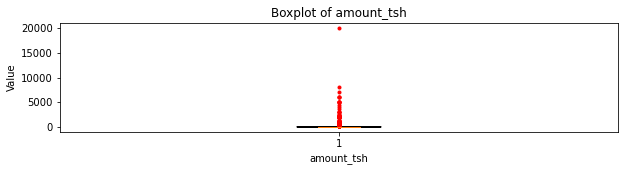

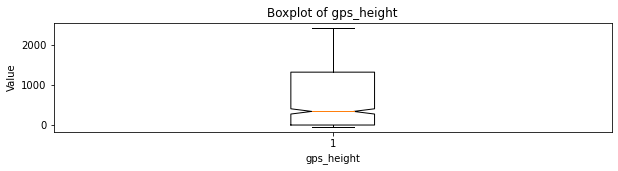

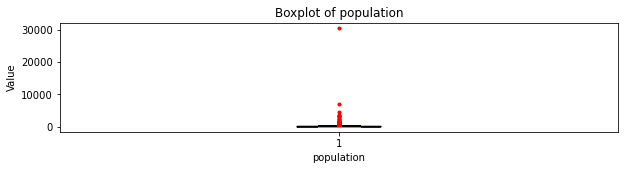

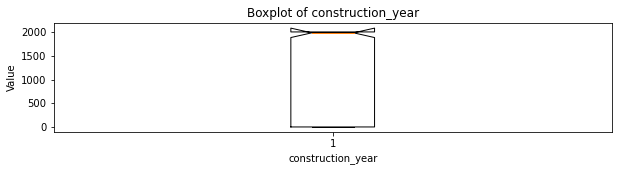

In [33]:
evaluate_outliers(dfn)

Three numeric colmns have outliers but  will work with them.

In [34]:
dfn.columns

Index(['amount_tsh', 'date_recorded', 'gps_height', 'basin', 'region', 'lga',
       'population', 'permit', 'construction_year', 'extraction_type_class',
       'management_group', 'payment_type', 'water_quality', 'quantity',
       'source_type', 'waterpoint_type', 'status_group'],
      dtype='object')

##### Data Labeling and Formatting

In [35]:
def rename_and_format_columns(df, column_mapping):
    """
    This function renames and formats the columns of a DataFrame based on the provided mapping.
    The mapping should be a dictionary where the keys are the current column names and the values are the desired new names.
    """
    for old_col, new_col in column_mapping.items():
        new_col = new_col.strip().replace(' ', '_').lower()
        df.rename(columns={old_col: new_col}, inplace=True)

# Example usage:
column_mapping = {
    'lga': 'local_government_area',
    'Column Name 1': 'new_column_1',
    'Column Name 2': 'new_column_2',
}

rename_and_format_columns(dfn, column_mapping)


In [36]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56344 entries, 0 to 59399
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             56344 non-null  float64
 1   date_recorded          56344 non-null  object 
 2   gps_height             56344 non-null  int64  
 3   basin                  56344 non-null  object 
 4   region                 56344 non-null  object 
 5   local_government_area  56344 non-null  object 
 6   population             56344 non-null  int64  
 7   permit                 56344 non-null  object 
 8   construction_year      56344 non-null  int64  
 9   extraction_type_class  56344 non-null  object 
 10  management_group       56344 non-null  object 
 11  payment_type           56344 non-null  object 
 12  water_quality          56344 non-null  object 
 13  quantity               56344 non-null  object 
 14  source_type            56344 non-null  object 
 15  wa

creating a new column with the construction decades and changing the "date_recorded" column to datetime

### Feature Engineering

In [37]:
import pandas as pd

def preprocess_data(df):
    # Change "date_recorded" to datetime
    df['date_recorded'] = pd.to_datetime(df['date_recorded'])

    # Create a list of boundaries for each decade
    decade_bins = [1960, 1970, 1980, 1990, 2000, 2010, 2021]

    # Create a list of labels for each decade, including the range of years
    decade_labels = [f'{decade}s ({decade}-{decade+9})' for decade in decade_bins[:-1]]

    # Bin "construction_year" into decades with custom labels
    df['construction_decade'] = pd.cut(df['construction_year'], bins=decade_bins, labels=decade_labels)

    # Convert "construction_decade" column to object (string) data type
    df['construction_decade'] = df['construction_decade'].astype('object')

    # Assign "Unknown" label to construction years with a value of 0
    df.loc[df['construction_year'] == 0, 'construction_decade'] = 'Unknown'

    # Fill missing values with a specified value, such as "Unknown"
    df['construction_decade'].fillna('Unknown', inplace=True)

    
    
    # Convert object columns to categorical 
    #object_cols = df.select_dtypes(include=['object']).columns
    #df[object_cols] = df[object_cols].astype('category')
    
    return df


In [38]:
preprocess_data(dfn)

,amount_tsh,date_recorded,gps_height,basin,region,local_government_area,population,permit,construction_year,extraction_type_class,management_group,payment_type,water_quality,quantity,source_type,waterpoint_type,status_group,construction_decade
0,6000.0,2011-03-14,1390,Lake Nyasa,Iringa,Ludewa,109,False,1999,gravity,user-group,annually,soft,enough,spring,communal standpipe,functional,1990s (1990-1999)
1,0.0,2013-03-06,1399,Lake Victoria,Mara,Serengeti,280,True,2010,gravity,user-group,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional,2000s (2000-2009)
2,25.0,2013-02-25,686,Pangani,Manyara,Simanjiro,250,True,2009,gravity,user-group,per bucket,soft,enough,dam,communal standpipe multiple,functional,2000s (2000-2009)
3,0.0,2013-01-28,263,Ruvuma / Southern Coast,Mtwara,Nanyumbu,58,True,1986,submersible,user-group,never pay,soft,dry,borehole,communal standpipe multiple,non functional,1980s (1980-1989)
4,0.0,2011-07-13,0,Lake Victoria,Kagera,Karagwe,0,True,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,2013-05-03,1210,Pangani,Kilimanjaro,Hai,125,True,1999,gravity,user-group,per bucket,soft,enough,spring,communal standpipe,functional,1990s (1990-1999)
59396,4700.0,2011-05-07,1212,Rufiji,Iringa,Njombe,56,True,1996,gravity,user-group,annually,soft,enough,river/lake,communal standpipe,functional,1990s (1990-1999)
59397,0.0,2011-04-11,0,Rufiji,Mbeya,Mbarali,0,False,0,handpump,user-group,monthly,fluoride,enough,borehole,hand pump,functional,Unknown
59398,0.0,2011-03-08,0,Rufiji,Dodoma,Chamwino,0,True,0,handpump,user-group,never pay,soft,insufficient,shallow well,hand pump,functional,Unknown


# EDA

##### Numerical Columns

In [39]:
def analyze_numeric_columns(dataframe):
    # Get the numeric columns
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64'])

    # Describe statistics of numeric columns
    statistics = numeric_columns.describe()
    print(statistics)

    # Plot distributions of numeric columns
    for column in numeric_columns.columns:
        plt.figure(figsize=(20, 6))
        sns.histplot(dataframe[column], kde=True, bins=20)
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()

          amount_tsh    gps_height    population  construction_year
count   56344.000000  56344.000000  56344.000000       56344.000000
mean      322.126009    656.737789    179.866587        1302.952116
std      2649.689666    690.373003    464.777124         950.936623
min         0.000000    -90.000000      0.000000           0.000000
25%         0.000000      0.000000      0.000000           0.000000
50%         0.000000    352.000000     30.000000        1986.000000
75%        30.000000   1301.000000    220.000000        2004.000000
max    250000.000000   2770.000000  30500.000000        2013.000000


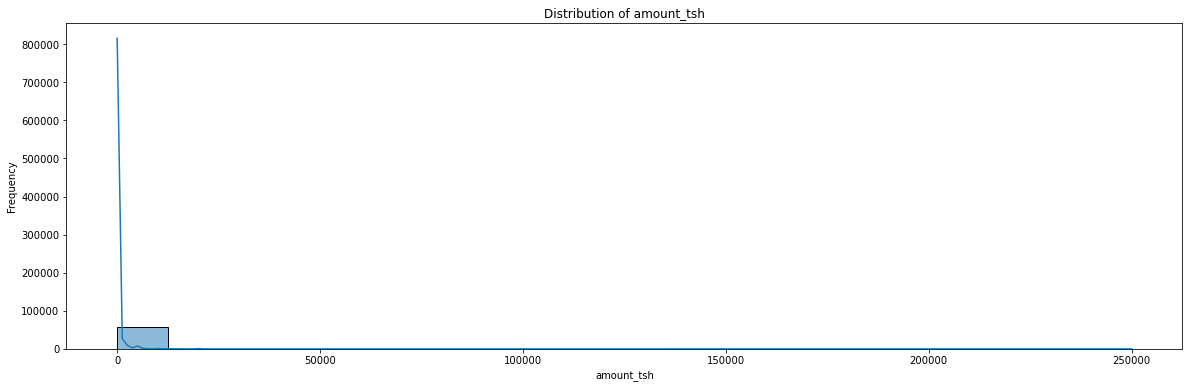

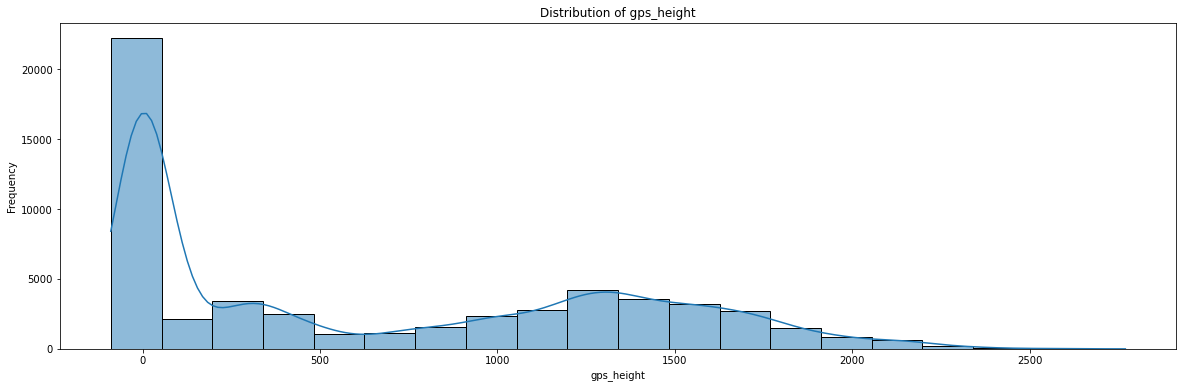

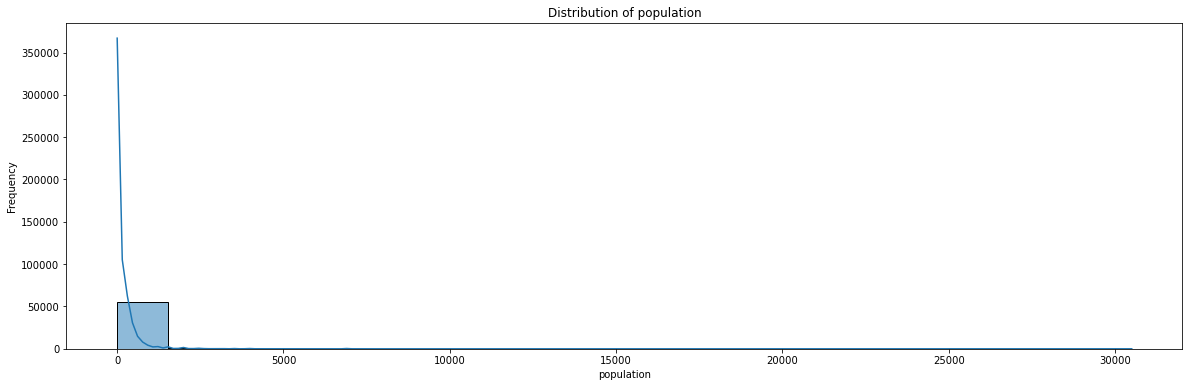

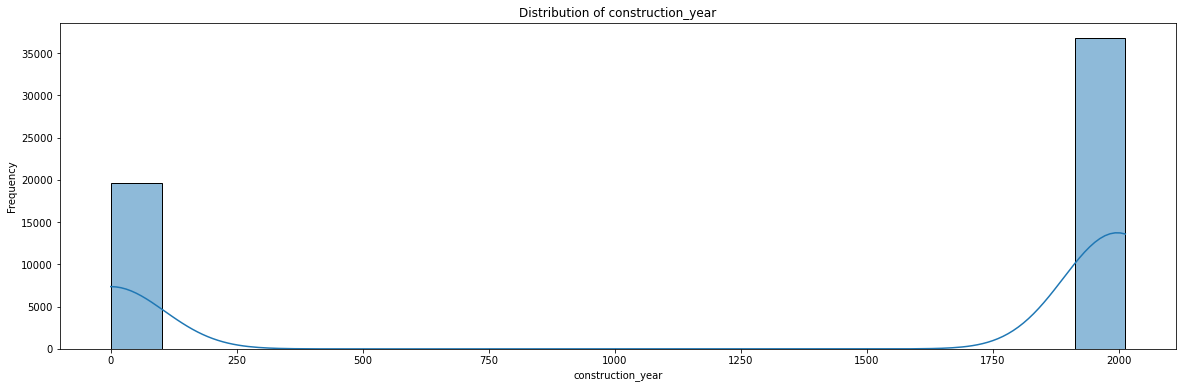

In [40]:
analyze_numeric_columns(dfn)


Based on the provided statistics of the numeric columns, here are some observations:

**amount_tsh**: The majority of values are zero (minimum is zero and 25th percentile is zero). The mean is relatively low at 326.6, but there is a high standard deviation of 2670.7, indicating a wide range of values. There is a large maximum value of 250,000.

**gps_height**: The minimum value is -90, indicating the presence of negative values. The mean height is 669.98, with a standard deviation of 690.94. The distribution appears to have a right skew, as the median (50th percentile) is lower than the mean.

**population**: Similar to amount_tsh, the majority of values are zero (minimum is zero and 25th percentile is zero). The mean population is 182.67, with a standard deviation of 467.57. The maximum value is relatively high at 30,500.

**construction_year**: There are many zero values in this column, which might represent unknown data. The mean year is 1330.36, which seems to be an incorrect value. The standard deviation is 941.72, indicating a wide range of years. The minimum year is zero, which aligns with the presence of zero values in the column.










##### Categorical Columns

In this section, I am evaluating the empirical relationship between the features columns and  the target column **status_group**

In [41]:
def plot_categorical_distribution(dataframe, column):
    if column in dataframe.columns:
        if dataframe[column].dtype == 'object':
            plt.figure(figsize=(10, 4))
            top_categories = dataframe[column].value_counts().nlargest(5).index
            sns.countplot(data=dataframe, x=column, hue='status_group', order=top_categories)
            plt.title(f"Distribution of {column} by status_group")
            plt.xlabel(column)
            plt.xticks(rotation=90)
            plt.legend(title='status_group')
            plt.show()

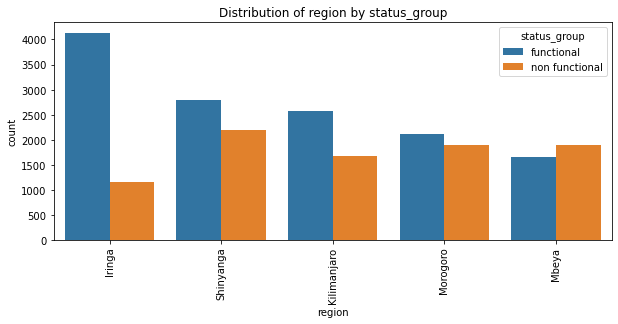

In [42]:
plot_categorical_distribution(dfn, 'region')

From the distribution above, Iringa region has the most functional wells compared to the rest of the regions followed by Shinyanga, Kilimanjaro, Morogoro and Mbeya.

**local_government_area**

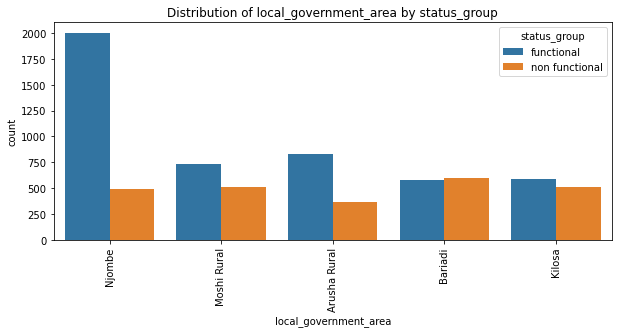

In [43]:
plot_categorical_distribution(dfn, 'local_government_area') 

Njombe region has the most functional wells followed by Moshi Rural, Arusha Rural, Bariadi and Kilosa.

**construction_decade**

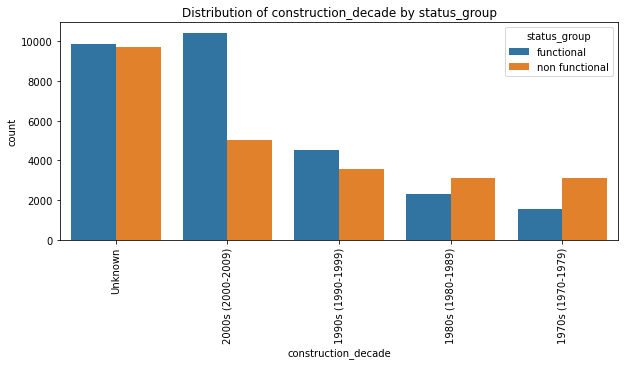

In [44]:
plot_categorical_distribution(dfn, 'construction_decade')

Majority of the wells constucted in the 2000s have more functional wells than the rest of the decades. However, the years in which majority of the wells were constructed are not defined

**basin**

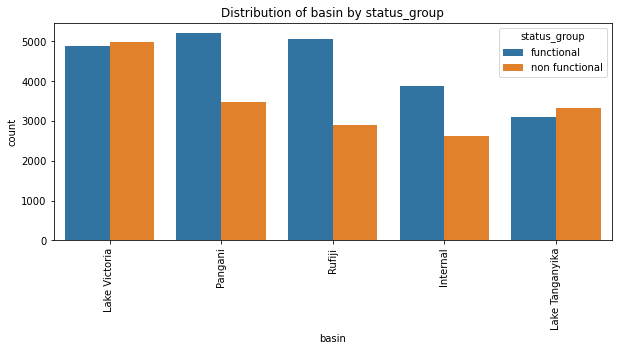

In [45]:
plot_categorical_distribution(dfn, 'basin')

Lake Pangani basin has more functional wells than all other basins.

**permit**

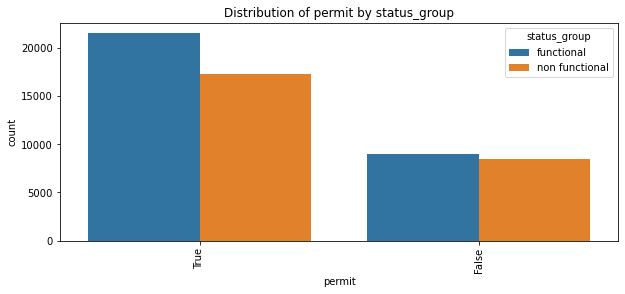

In [46]:
plot_categorical_distribution(dfn, 'permit')

Majority of the wells have a permit.

**extraction_type_class**

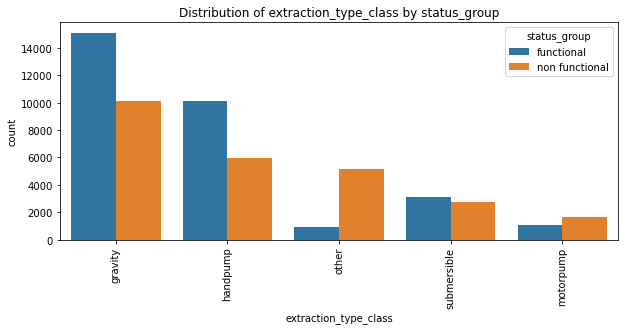

In [47]:
plot_categorical_distribution(dfn, 'extraction_type_class')

Majority of the gravity extraction class have wells 

**Management_group**

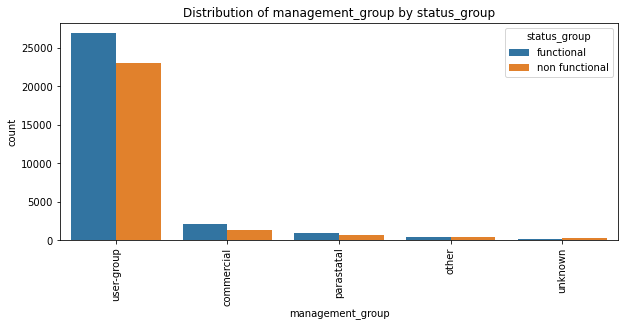

In [48]:
plot_categorical_distribution(dfn, 'management_group')

**Payment_type**

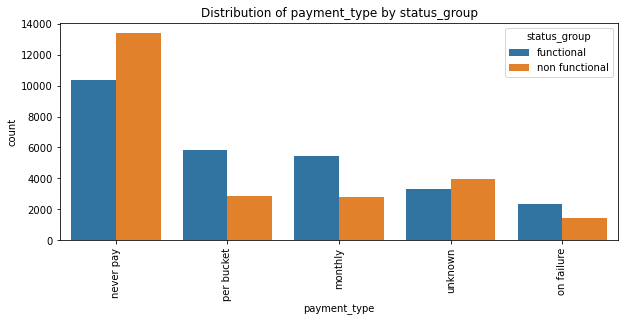

In [49]:
plot_categorical_distribution(dfn, 'payment_type')

**Water_quality**

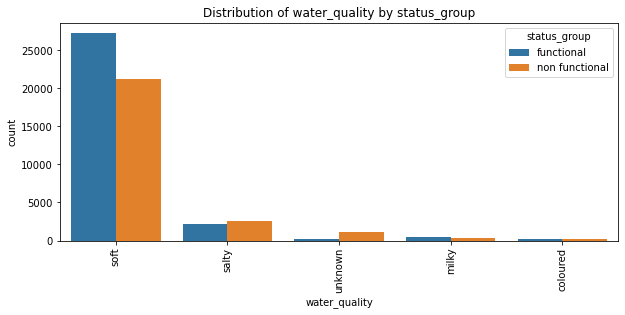

In [50]:
plot_categorical_distribution(dfn, 'water_quality')

**quantity**

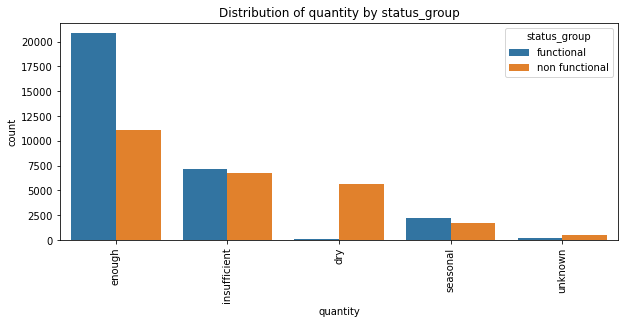

In [51]:
plot_categorical_distribution(dfn, 'quantity')

**source_type**

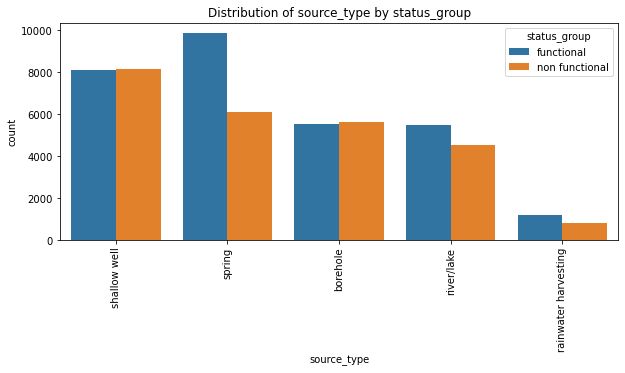

In [52]:
plot_categorical_distribution(dfn, 'source_type')

**waterpoint_type**

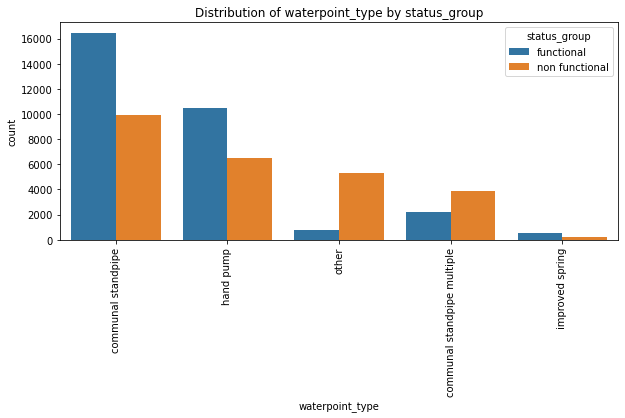

In [53]:
plot_categorical_distribution(dfn, 'waterpoint_type')

In [54]:
# dfn.to_csv('clean_data.csv')

In [55]:
# Finding correlation between features using a heatmap
def corrmatrix(df):
    ''' This function plots a correlation matrix for a given dataframe '''
    plt.figure(figsize=(20, 6))

    corr = df.corr()

    # Generate a mask to only show the bottom triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # generate heatmap
    sns.heatmap(round(corr,2), annot=True, mask=mask, vmin=-1, vmax=1, cmap='Blues')
    plt.title('Correlation of Features')
    plt.show()

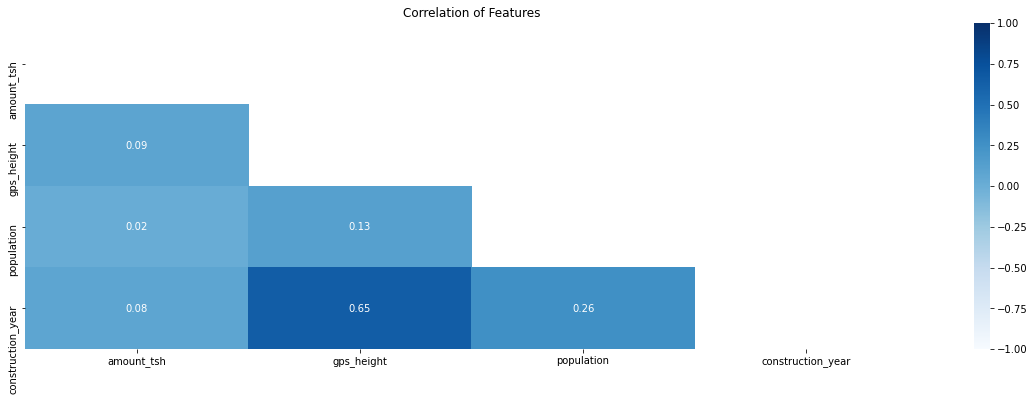

In [56]:
corrmatrix(dfn)

The construction year and gps_height have a high positive correlation.

# Modeling

The goal of this section is to build a model that can predict the status of a Tanzanian well based on the features in our dataset. The model will be evaluated on the accuracy of its predictions. Specifically, if it achieves an accuracy of 75% or higher, it will be considered a success.

In [57]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [58]:
df_model = pd.read_csv('clean_data.csv', index_col=0)
df_model.head()

,amount_tsh,date_recorded,gps_height,basin,region,local_government_area,population,permit,construction_year,extraction_type_class,management_group,payment_type,water_quality,quantity,source_type,waterpoint_type,status_group,construction_decade
0,6000.0,2011-03-14,1390,Lake Nyasa,Iringa,Ludewa,109,False,1999,gravity,user-group,annually,soft,enough,spring,communal standpipe,functional,1990s (1990-1999)
1,0.0,2013-03-06,1399,Lake Victoria,Mara,Serengeti,280,True,2010,gravity,user-group,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional,2000s (2000-2009)
2,25.0,2013-02-25,686,Pangani,Manyara,Simanjiro,250,True,2009,gravity,user-group,per bucket,soft,enough,dam,communal standpipe multiple,functional,2000s (2000-2009)
3,0.0,2013-01-28,263,Ruvuma / Southern Coast,Mtwara,Nanyumbu,58,True,1986,submersible,user-group,never pay,soft,dry,borehole,communal standpipe multiple,non functional,1980s (1980-1989)
4,0.0,2011-07-13,0,Lake Victoria,Kagera,Karagwe,0,True,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional,Unknown


In [59]:
categorical_cols = ['region', 'extraction_type_class', 'management_group', 
                    'quantity', 'water_quality' , 'waterpoint_type', 'source_type', 'status_group' ] 

In [60]:
numerical_cols = ['amount_tsh','gps_height', 'population'] 

In [61]:
# Encoding
# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Encode the categorical columns in the DataFrame
for col in categorical_cols:
    df_model[col] = encoder.fit_transform(df_model[col])

# covert categorical columns to integer
for col in categorical_cols:
    df_model[col] = df_model[col].astype(int)


In [62]:
df_model.head()

,amount_tsh,date_recorded,gps_height,basin,region,local_government_area,population,permit,construction_year,extraction_type_class,management_group,payment_type,water_quality,quantity,source_type,waterpoint_type,status_group,construction_decade
0,6000.0,2011-03-14,1390,Lake Nyasa,3,Ludewa,109,False,1999,0,4,annually,6,1,6,1,0,1990s (1990-1999)
1,0.0,2013-03-06,1399,Lake Victoria,9,Serengeti,280,True,2010,0,4,never pay,6,2,3,1,0,2000s (2000-2009)
2,25.0,2013-02-25,686,Pangani,8,Simanjiro,250,True,2009,0,4,per bucket,6,1,1,2,0,2000s (2000-2009)
3,0.0,2013-01-28,263,Ruvuma / Southern Coast,12,Nanyumbu,58,True,1986,5,4,never pay,6,0,0,2,1,1980s (1980-1989)
4,0.0,2011-07-13,0,Lake Victoria,4,Karagwe,0,True,0,0,1,never pay,6,3,3,1,0,Unknown


In [63]:
df_model.drop(['date_recorded', 'construction_year', 'basin', 'local_government_area', 
                  'payment_type', 'permit', 'construction_decade'], axis=1, inplace=True)

In [64]:
n_samples = 14086
X = np.random.rand(n_samples, 10)
y = np.array([0]*7534 + [1]*6552) 
# Split Dataset
X = df_model.drop('status_group', axis=1) 
y = df_model['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [65]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56344 entries, 0 to 59399
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             56344 non-null  float64
 1   gps_height             56344 non-null  int64  
 2   region                 56344 non-null  int32  
 3   population             56344 non-null  int64  
 4   extraction_type_class  56344 non-null  int32  
 5   management_group       56344 non-null  int32  
 6   water_quality          56344 non-null  int32  
 7   quantity               56344 non-null  int32  
 8   source_type            56344 non-null  int32  
 9   waterpoint_type        56344 non-null  int32  
dtypes: float64(1), int32(7), int64(2)
memory usage: 3.2 MB


## Models

My data is now ready to be modeled. To begin, we will fit a dummy cllassifier model as my baseline model and analyze its performance indicators. Following that, I will fit several more classification models and evaluate their performance measures. 

The goal is to start easy and work my way to harder and more complex models. I aim to build some models and their hyperparameter tuned counterparts. These are:

- DecisionTreeClassifier
- RandomForestClassifier
- K-Nearest Neighbors(KNN)
- Support Vector Machine(SVM) Classifier 
The models suit this problem well because they are classifiers, and this is a classification problem.
Starting with our baseline accuracy,I can improve from there. If each of our models predicted every well to be functional, meaning it does not need repair, it would be 53% accurate. From there, we can compare the final accuracy numbers to see how each model performs.

Accuracy will be the main metric used to evaluate these models. This is because we want the model to be able to correctly classify the wells above all else. The rest of the metrics will be used as support metrics. The remaining models will subsequently be tuned with ensemble methods.


### 1. Dummy Classifier - Baseline model

> DummyClassifier makes predictions that ignore the input features. This classifier serves as a simple baseline to compare against other more complex classifiers. 

In [66]:
# Build a pipeline with a StandardScaler and a DummyClassifier
dummy_pipe = Pipeline([('scaler', StandardScaler()), 
                ('dummy', DummyClassifier(strategy="most_frequent", random_state=42))])
# fit the pipeline to the training set
dummy_pipe.fit(X_train, y_train)
# make predictions on the test set
y_pred_dummy = dummy_pipe.predict(X_test)
# Generate and print the classification report 
print("Classification Report:")
print(classification_report(y_test,y_pred_dummy))

Classification Report:
              precision    recall  f1-score   support

           0       0.53      1.00      0.70      7534
           1       0.00      0.00      0.00      6552

    accuracy                           0.53     14086
   macro avg       0.27      0.50      0.35     14086
weighted avg       0.29      0.53      0.37     14086



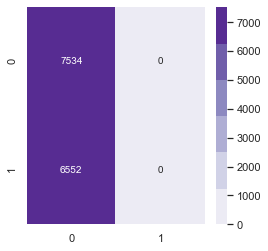

In [67]:
# Define a custom color palette
color_palette = sns.color_palette("Purples")
# plot the confusion matrix 
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test, y_pred_dummy), annot=True, fmt='g', cmap=color_palette); 

- In terms of accuracy, the dummy classifier achieves an accuracy of 0.53, meaning that it correctly predicts the class for around 53% of the instances. In general this is relatively a standard start for a baseline model

- Overall, these results indicate that the dummy classifier performs poorly in predicting class 1, as it never correctly identifies any instances of that class. It performs better in predicting class 0, achieving a reasonable precision and recall. 

### 2. Decision Tree Classifier

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. The intuition behind Decision Trees is that you use the dataset features to create yes/no questions and continually split the dataset until you isolate all data points belonging to each class.

In [68]:
# Create a pipeline with a decision tree classifier as the estimator:
dt = Pipeline([('scaler', StandardScaler()),
                  ('tree', DecisionTreeClassifier(random_state=42))])
# fit the pipeline to the training set
dt.fit(X_train, y_train)
# make predictions on the test set
y_pred_dt = dt.predict(X_test)

# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.81      0.78      7534
           1       0.76      0.68      0.72      6552

    accuracy                           0.75     14086
   macro avg       0.75      0.75      0.75     14086
weighted avg       0.75      0.75      0.75     14086



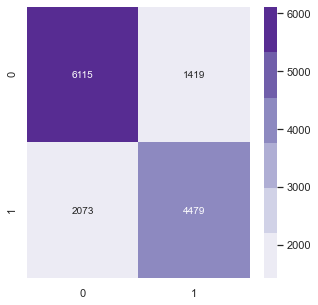

In [69]:
# Define a custom color palette
color_palette = sns.color_palette("Purples")
# plot the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='g', cmap=color_palette); 


- The accuracy score represents the proportion of correctly predicted instances out of the total number of instances. In this case, the decision tree model achieved an accuracy of around 0.75, indicating that it predicted 75% of instances correctly.

### 3. Random Forest Classifier

Random forests, also known as random decision forests, are an ensemble learning technique for classification, regression, and other tasks. During training, a large number of decision trees are built, and at the end of the process, the class that results is the mean prediction (in regression) or the mode of the classes (in classification) of the individual trees.

In [70]:
# Create a pipeline with a StandardScaler and a RandomForestClassifier.
rf = Pipeline([('scaler', StandardScaler()),
                  ('rf', RandomForestClassifier(random_state=42))])
# fit the pipeline to the training data
rf.fit(X_train, y_train);
# make predictions on the test data
y_pred_rf = rf.predict(X_test)

# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.81      7534
           1       0.81      0.70      0.75      6552

    accuracy                           0.78     14086
   macro avg       0.78      0.77      0.78     14086
weighted avg       0.78      0.78      0.78     14086



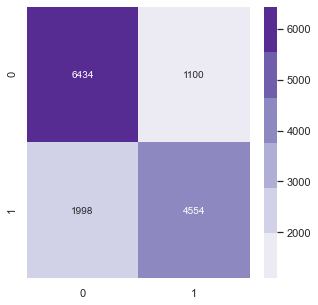

In [71]:
# plot the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='g', cmap=color_palette);

- The model has an overall accuracy of 0.78, meaning that roughly 78% of the cases are properly predicted.

### 4. Support Vector Machine (SVM) classifier

A Support Vector Machine (SVM) is a supervised machine learning model that is primarily used for classification tasks, although it can also be applied to regression and outlier detection.

In [72]:
# Create a pipeline with an SVM classifier as the estimator
svm_clf  = Pipeline([('scaler', StandardScaler()),
    ('classifier', SVC(random_state=42))])

# Fit the pipeline on the training data
svm_clf.fit(X_train, y_train)

# Make predictions on the test data using the trained pipeline
y_pred_svm = svm_clf.predict(X_test)

# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.91      0.78      7534
           1       0.84      0.51      0.64      6552

    accuracy                           0.73     14086
   macro avg       0.76      0.71      0.71     14086
weighted avg       0.75      0.73      0.71     14086



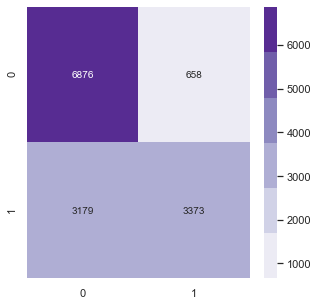

In [73]:
# plot the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='g', cmap=color_palette);

- The model's overall accuracy is 0.73, meaning that roughly 73% of the cases are accurately predicted.

###  5. K-Nearest Neighbors(KNN)

KNN is a straightforward algorithm that categorizes new cases according to a similarity metric (such as distance functions) and records all of the cases that are accessible. It is a non-parametric algorithm that makes predictions based on the similarity of data points in the feature space. KNN has been applied to pattern recognition and statistical estimation.

In [74]:
knn_clf = Pipeline([('scaler', StandardScaler()),
                     ('knn_clf', KNeighborsClassifier())
])

# Fit the pipeline to the training data
knn_clf.fit(X_train, y_train)

# make predictions on test data 
y_pred_knn = knn_clf.predict(X_test)

# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.83      0.79      7534
           1       0.78      0.68      0.73      6552

    accuracy                           0.76     14086
   macro avg       0.76      0.76      0.76     14086
weighted avg       0.76      0.76      0.76     14086



- The accuracy of the model is 0.76, indicating that it correctly classifies 76% of the instances.

### 6. K-Nearest Neighbors with grid search(Hyperparameter tuned)

The K-Nearest Neighbors (KNN) algorithm is a simple, yet effective, supervised machine learning algorithm used for classification and regression tasks. It classifies a data point based on the majority class among its k nearest neighbors. Grid search is a method to perform hyperparameter tuning, which is the process of finding the optimal hyperparameters for a model.

In [75]:
# Define the parameter grid for GridSearchCV
param_grid_knn = {
    'knn_clf__n_neighbors': [3, 5, 7],
    'knn_clf__weights': ['uniform', 'distance'],
    'knn_clf__p': [1, 2]
}

# Create the GridSearchCV object
gridsearch_knn = GridSearchCV(estimator=knn_clf, param_grid=param_grid_knn, cv=5, verbose=2, n_jobs=-1)

# Fit the GridSearchCV on the training data
gridsearch_knn.fit(X_train, y_train)

# Get the best parameters
best_params_knn = gridsearch_knn.best_params_

print("Best Parameters:", best_params_knn)

# Make predictions on the test data using the trained pipeline
y_pred_gridsearchknn = gridsearch_knn.predict(X_test)

# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_gridsearchknn))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.3min finished


Best Parameters: {'knn_clf__n_neighbors': 7, 'knn_clf__p': 1, 'knn_clf__weights': 'distance'}
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.83      0.79      7534
           1       0.78      0.69      0.73      6552

    accuracy                           0.77     14086
   macro avg       0.77      0.76      0.76     14086
weighted avg       0.77      0.77      0.76     14086



Best Parameters: The best parameters found during the grid search are:

- Number of neighbors (knn_clf__n_neighbors): 7
- Distance metric power parameter (knn_clf__p): 1
- Weighting scheme (knn_clf__weights): 'distance'


- Accuracy: The accuracy of the model is 0.77, indicating that it correctly classifies 77% of the instances.

### 7. Decision Tree with GridsearchCV(hyperparameter tuned)

In [76]:
dt = Pipeline([('scaler', StandardScaler()),
                  ('tree', DecisionTreeClassifier(random_state=42))])

# create a grid of parameters to test
param_grid = [{'tree__max_depth': [16, 18, 20],
              'tree__min_samples_split': [4, 6, 8],
              'tree__min_samples_leaf': [2, 3, 4],
              'tree__criterion': ['gini', 'entropy']}]

# create grid with estimators
gridsearch_dt = GridSearchCV(dt, param_grid, cv=5, n_jobs=-1, verbose=1)

# fit the grid with the data    
gridsearch_dt.fit(X_train, y_train);

# Get the best parameters
best_params_dt = gridsearch_dt.best_params_

print("Best Parameters:", best_params_dt)
# Make predictions on the test data using the trained pipeline
y_pred_gridsearchdt = gridsearch_dt.predict(X_test)

# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_gridsearchdt))

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   22.6s finished


Best Parameters: {'tree__criterion': 'gini', 'tree__max_depth': 18, 'tree__min_samples_leaf': 2, 'tree__min_samples_split': 8}
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      7534
           1       0.79      0.67      0.72      6552

    accuracy                           0.76     14086
   macro avg       0.77      0.76      0.76     14086
weighted avg       0.77      0.76      0.76     14086



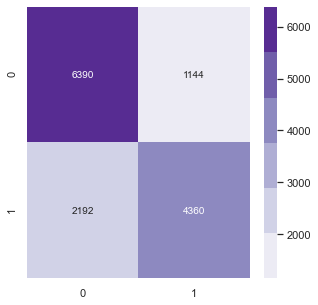

In [77]:
# plot the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred_gridsearchdt), annot=True, fmt='g', cmap=color_palette);

- Accuracy: The accuracy of the model is 0.76, indicating that it correctly classifies 76% of the instances.

### 8. Random Forest with GridsearchCV(Hyperparameter tuned)

In [79]:
# Define the parameter grid for GridSearchCV
param_grid_rf = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [7, 8],
    'rf__max_features': [7, 8],
    'rf__min_samples_leaf': [1, 2],
    'rf__min_samples_split': [2, 3],
    'rf__criterion': ['gini', 'entropy'],
    'rf__bootstrap': [True, False],
    'rf__random_state': [42]
}

# Create the GridSearchCV object
gridsearch_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, verbose=2, n_jobs=-1)

# Fit the GridSearchCV on the training data
gridsearch_rf.fit(X_train, y_train)

# Get the best parameters
best_params_rf = gridsearch_rf.best_params_

print("Best Parameters:", best_params_rf)

# Make predictions on the test data using the trained pipeline
y_pred_gridsearchrf = gridsearch_rf.predict(X_test)

# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_gridsearchrf))

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 31.4min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed: 52.5min finished


Best Parameters: {'rf__bootstrap': False, 'rf__criterion': 'gini', 'rf__max_depth': 8, 'rf__max_features': 7, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 2, 'rf__n_estimators': 300, 'rf__random_state': 42}
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.93      0.80      7534
           1       0.87      0.53      0.66      6552

    accuracy                           0.74     14086
   macro avg       0.78      0.73      0.73     14086
weighted avg       0.78      0.74      0.73     14086



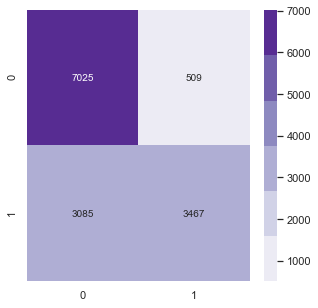

In [80]:
 # plot the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred_gridsearchrf), annot=True, fmt='g', cmap=color_palette);

- Best Parameters: The best parameters found during the grid search are:

    - Bootstrap (rf__bootstrap): False
    - Splitting criterion (rf__criterion): 'gini'
    - Maximum depth of trees (rf__max_depth): 8
    - Maximum number of features considered for splitting (rf__max_features): 7
    - Minimum number of samples required to be at a leaf node (rf__min_samples_leaf): 2
    - Minimum number of samples required to split an internal node (rf__min_samples_split): 2
    - Number of trees in the random forest (rf__n_estimators): 300
    - Random state for reproducibility (rf__random_state): 42

 - The accuracy of the model is 0.74, indicating that it correctly classifies 74% of the instances.

### Evaluation
I ran a total of 8 models, the baseline models and their hyperparameter tuned versions. The performance of the models varied with some overfitting on the training data and some not performing as well as expected. Notably, the performance of the some models reduced when I hyperparameter tuned the model. I attribute this to not having a wide enough search space for the best parameters. This can be improved upon in other iterations of the model.

These were how the models performed in terms of accuracy:

1. Random Forest Classifier - (78%)
2. KNN - (77%)
3. Decision Tree Classifier - (76%)
4. Support Vector Machine(SVM) Classifier - (73%)
5. Dummy Classifier - (53%)

The best performing model was RandomForestClassifier. This is therefore, our final model. The model fits our data well with these being the other evaluation metrics:

1. Precision score - (81%)
2. Recall - (70%)
3. F1 score - (75%)

Since the test data has relatively high scores, I assert that the model would generalize beyond the current data. This suggests that learning and accurate prediction are capabilities of the model. Because we fed it with high-quality data, the model also worked quite effectively.

The model would serve the Ministry of Water well in its pursuit to know and identify which areas/factors to lay empasis on and make a real impact on the residents of Tanzania.


## Conclusion
